# Arctic Penguin Exploration: Unraveling Clusters in the Icy Domain with K-means clustering

![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, our task is to apply your data science skills to help them identify groups in the dataset!

In [279]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("data/penguins.csv")

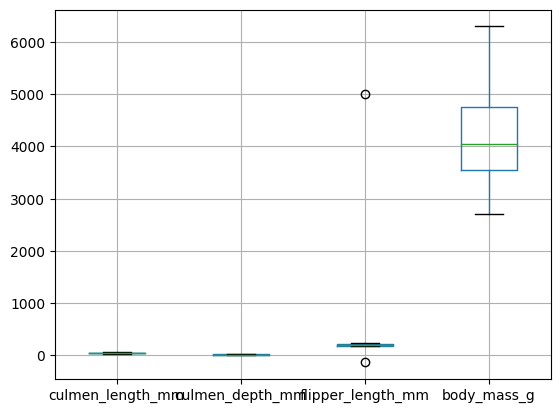

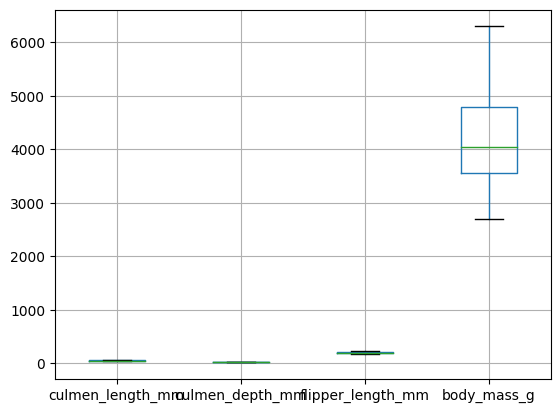

In [280]:
#examining the dataset
penguins_df.boxplot()
plt.show()

#Dealing with null values and outliers
penguins_clean = penguins_df.dropna()
penguins_clean[penguins_clean['flipper_length_mm']>4000]
penguins_clean[penguins_clean['flipper_length_mm']<0]
penguins_clean = penguins_clean.drop([9,14])

penguins_clean.boxplot()
plt.show()

In [281]:

#creating dummy variables
df = pd.get_dummies(penguins_clean).drop('sex_.',axis=1)

#Performing preprocessing steps on the dataset - scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)
penguins_preprocessed = pd.DataFrame(data=X,columns=df.columns)
penguins_preprocessed.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
5,-0.942311,0.333002,-1.428125,-0.725033,1.009050,-1.003008
6,-0.887125,1.253249,-0.429637,0.579691,-0.991031,0.997001
7,-0.537611,0.230753,-1.356804,-1.253136,1.009050,-1.003008
8,-0.997497,2.071247,-0.714919,-0.507579,-0.991031,0.997001
9,-1.365406,0.333002,-1.142843,-0.631839,1.009050,-1.003008


In [282]:
#Performing PCA

pca = PCA(n_components=None)
df_pca = pca.fit(penguins_preprocessed)
df_pca.explained_variance_ratio_
n_components=sum(df_pca.explained_variance_ratio_>0.1)
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)




        

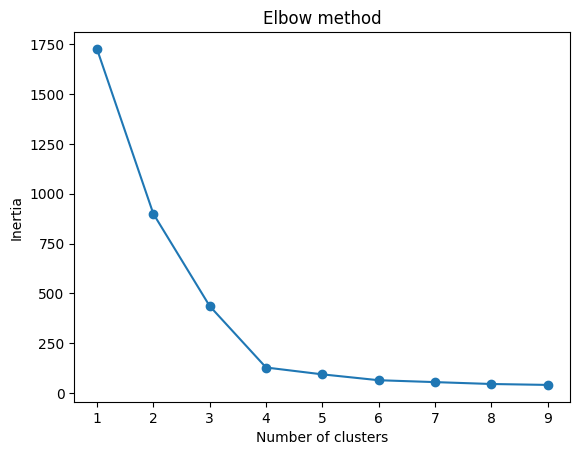

In [283]:
#Detecting the optimal number of clusters for k-means clustering

inertias = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(penguins_PCA)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

n_clusters=4




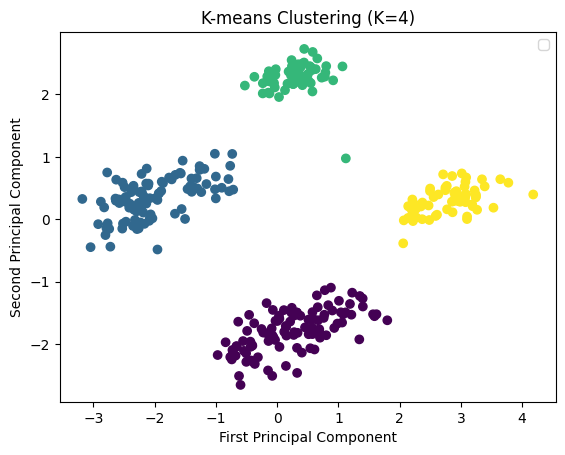

In [284]:
#Running the KMeans clustering algorithm
kmeans = KMeans(n_clusters = n_clusters, random_state = 42).fit(penguins_PCA)
label = kmeans.predict(penguins_PCA)


plt.scatter(penguins_PCA[:,0], penguins_PCA[:,1], c = label)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.legend()
plt.show()

In [285]:
#Creating a final statistical DataFrame for each cluster.
penguins_clean['label'] = kmeans.labels_
penguins_clean.head()

numeric_cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']

stat_penguins = penguins_clean.groupby("label")[numerical_cols].agg('mean')
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066
